In [3]:
import matplotlib
matplotlib.use('nbAgg')

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load profile_collection stuff
%run -i ~/.ipython/profile_collection/startup/00-startup.py
%run -i ~/.ipython/profile_collection/startup/10-motors.py
%run -i ~/.ipython/profile_collection/startup/15-optics.py
%run -i ~/.ipython/profile_collection/startup/25-cameras.py
%run -i ~/.ipython/profile_collection/startup/81-dexela.py
%run -i ~/.ipython/profile_collection/startup/82-blackfly.py 

In [3]:
%matplotlib inline

In [4]:
dexela

XPDDDexelaDetector(prefix='XF:28IDD-ES:2{Det:DEX}', name='dexela', read_attrs=['stats1', 'stats1.total', 'tiff'], configuration_attrs=['cam', 'cam.acquire_period', 'cam.acquire_time', 'cam.image_mode', 'cam.trigger_mode', 'stats1', 'stats1.configuration_names', 'stats1.port_name', 'stats1.asyn_pipeline_config', 'stats1.blocking_callbacks', 'stats1.enable', 'stats1.nd_array_port', 'stats1.plugin_type', 'stats1.bgd_width', 'stats1.centroid_threshold', 'stats1.compute_centroid', 'stats1.compute_histogram', 'stats1.compute_profiles', 'stats1.compute_statistics', 'stats1.hist_max', 'stats1.hist_min', 'stats1.hist_size', 'stats1.profile_cursor', 'stats1.profile_size', 'stats1.ts_num_points', 'tiff', 'detector_type'])

Transient Scan ID: 1004     Time: 2019-10-06 13:05:17
Persistent Unique Scan ID: '54210bd7-948a-477f-b3af-36db62cd2529'
New stream: 'primary'
+-----------+------------+---------------------+
|   seq_num |       time | dexela_stats1_total |
+-----------+------------+---------------------+
|         1 | 13:05:19.7 |          1534582193 |
|         2 | 13:05:21.6 |          1531430478 |
|         3 | 13:05:23.6 |          1533455358 |
|         4 | 13:05:25.5 |          1535376583 |
|         5 | 13:05:27.5 |          1533306148 |
|         6 | 13:05:29.4 |          1532748419 |
|         7 | 13:05:31.3 |          1534470425 |
|         8 | 13:05:33.3 |          1535323505 |
|         9 | 13:05:35.2 |          1535162918 |
|        10 | 13:05:37.2 |          1534144587 |
+-----------+------------+---------------------+
generator count ['54210bd7'] (scan num: 1004)





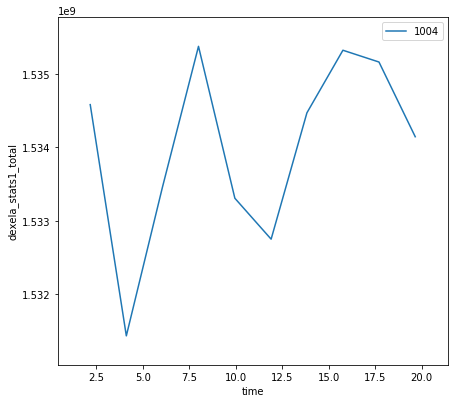

In [5]:
dark_hdr, = RE(count([dexela],num=10))

In [6]:
hdr = db[dark_hdr]
print(hdr.fields())
hdr.table(fill=True)

{'dexela_image', 'dexela_stats1_total'}


FileNotFoundError: [Errno 2] No such file or directory: '/nsls2/xf28id2/dex_data/2019/10/06/da5652a0-99c6-4c8e-931b_000010.tiff'

In [7]:
# Fix by Maksim

import databroker
from databroker import Broker

from databroker.assets.handlers import AreaDetectorTiffHandler
db = Broker.named('xpdd')

class SaferAreaDetectorTiffHandler(AreaDetectorTiffHandler):
    def __call__(self, *args, **kwargs):
        try:
            return super().__call__(*args, **kwargs)
        except FileNotFoundError:
            self._fpp = 1
            return super().__call__(*args, **kwargs)
        
db.reg.register_handler('AD_TIFF', SaferAreaDetectorTiffHandler, overwrite=True)

In [8]:
hdr = db[dark_hdr]
print(hdr.fields())
hdr.table(fill=True)

{'dexela_image', 'dexela_stats1_total'}


,time,dexela_stats1_total,dexela_image
seq_num,,,
1,2019-10-06 13:05:19.729120493,1.534582e+09,"[[123, 115, 140, 114, 123, 119, 111, 110, 125,..."
2,2019-10-06 13:05:21.670712471,1.531430e+09,"[[129, 114, 131, 127, 123, 121, 122, 116, 121,..."
3,2019-10-06 13:05:23.611811876,1.533455e+09,"[[138, 106, 123, 123, 112, 134, 107, 130, 127,..."
4,2019-10-06 13:05:25.552123308,1.535377e+09,"[[122, 128, 128, 110, 112, 127, 129, 107, 131,..."
5,2019-10-06 13:05:27.507904291,1.533306e+09,"[[125, 104, 134, 121, 115, 124, 118, 135, 131,..."
6,2019-10-06 13:05:29.458490849,1.532748e+09,"[[122, 105, 110, 119, 113, 111, 110, 115, 113,..."
7,2019-10-06 13:05:31.383546591,1.534470e+09,"[[130, 110, 116, 117, 112, 126, 126, 120, 113,..."
8,2019-10-06 13:05:33.319996595,1.535324e+09,"[[125, 110, 114, 129, 116, 119, 129, 119, 126,..."
9,2019-10-06 13:05:35.259457111,1.535163e+09,"[[141, 113, 123, 118, 116, 122, 115, 122, 111,..."


In [ ]:
# Problem is solved!
# 00-startup.py was modified accordingly...